## **Model VGG 19 (Pre-trained Model)**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model

In [ ]:
# clear backend
# fix the seed for random number generators
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
## VGG19 is the 19-layer updated version of convolution neural net (CNN ) architecture from VGG16, which won ILSVR(Imagenet) competition in 2014. 

vgg19 = VGG19(include_top = False, 
             weights = 'imagenet', 
             input_shape = (64,64,3))

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Retrieve a layer based on either its name (unique) or index

transfer_layer19 = vgg19.get_layer('block5_pool')

# Freeze the vgg2 layers
# Set vgg2.trainable to False moves all the layer's weights from trainable to non-trainable

vgg19.trainable = False

In [ ]:
# Add classification layers on top of it  

x = Flatten()(transfer_layer19.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.3)(x)
x = Dense(64, activation='relu')(x)
pred = Dense(2, activation='softmax')(x)
model19 = Model(vgg19.input, pred) 

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

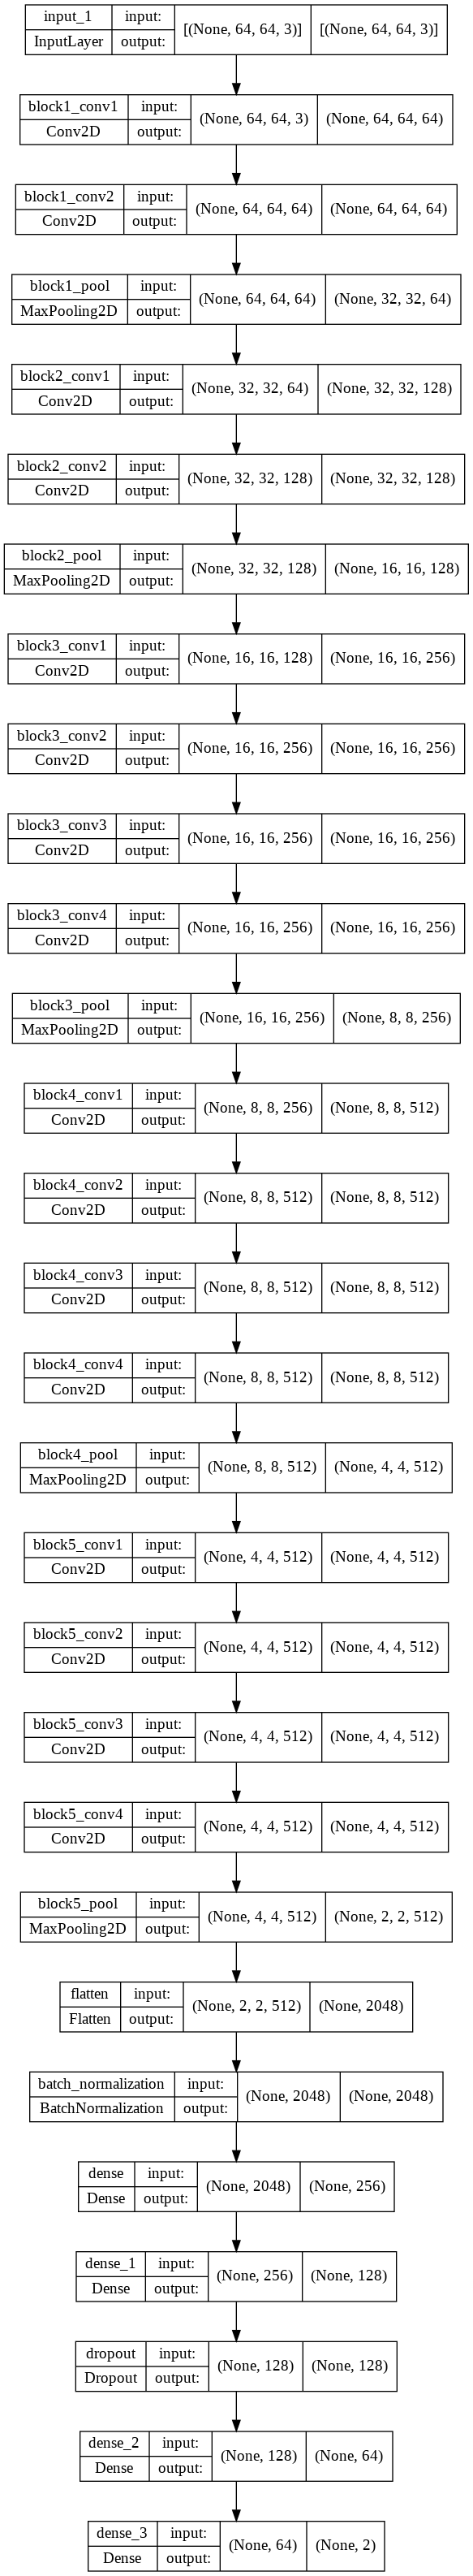

In [ ]:
plot_model(model19, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate = 1e-5)
model19.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = (['accuracy']))

In [ ]:
# Fit and run the model 
hist = model19.fit(train_images, 
                 train_labels,
                 epochs= 10,
                 callbacks = callbacks,
                 batch_size = 32,
                 validation_split = 0.15,
                 verbose = 1)

Epoch 1/10
663/663 [==============================] - 18s 26ms/step - loss: 0.2448 - accuracy: 0.9015 - val_loss: 0.1488 - val_accuracy: 0.9669
Epoch 2/10
663/663 [==============================] - 17s 26ms/step - loss: 0.1893 - accuracy: 0.9250 - val_loss: 0.1896 - val_accuracy: 0.9474
Epoch 3/10
663/663 [==============================] - 17s 25ms/step - loss: 0.1651 - accuracy: 0.9364 - val_loss: 0.1898 - val_accuracy: 0.9557
Epoch 4/10
663/663 [==============================] - 17s 25ms/step - loss: 0.1508 - accuracy: 0.9439 - val_loss: 0.2209 - val_accuracy: 0.9290
Epoch 5/10
663/663 [==============================] - 17s 25ms/step - loss: 0.1399 - accuracy: 0.9469 - val_loss: 0.1563 - val_accuracy: 0.9621


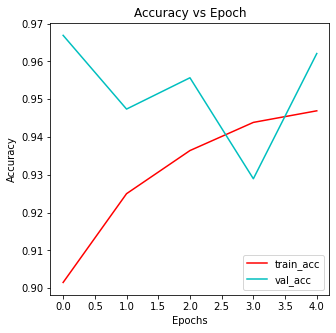

In [ ]:
# Plot the accuracies
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

In [ ]:
# Evaluate the model on test data
accuracy = model19.evaluate(test_images, 
                          test_labels, 
                          verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 21ms/step - loss: 0.1748 - accuracy: 0.9315

 Test_Accuracy:- 0.931538462638855


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1300
           1       0.93      0.94      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1300
           1       0.93      0.94      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



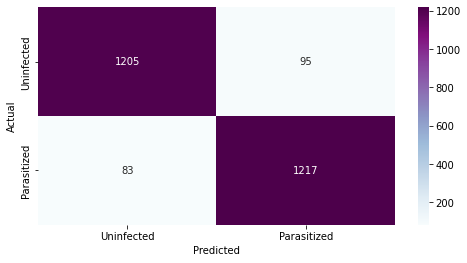

In [ ]:
# np.argmax returns the indices of the max values along axis 1
# print the classification report

pred = model19.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)
print(classification_report(y_tru, pred))

# plot the heatmap with confusion matrix

print(classification_report(y_tru, pred))
cm19 = confusion_matrix(y_tru, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm19, 
            annot = True,  
            fmt = '.0f', 
            cmap="BuPu",
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()